In [11]:
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = 'gtue9EzYu5TtFO6je2xtOrBPl'
consumer_secret = 'GUlNFl71RrkHljL3Q5w46FoeUp7gl1KPiVLsOBpH9nPviOjKO9'
access_token = '942946263087038464-20jcxQDiydxE46CbGncApqpUlGCp58w'
access_token_secret = 'y36pUFhmuZjMyjtlF5vRRziWhneHhmE9X3ivVneFTsx3z'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
#Get the most recent 100 tweets from a user and appending each tweet's sentiment score to lists
def getTweetAnalysis(target_user):
    compList = []
    posList = []
    negList = []
    neutList = []
    public_tweets = api.user_timeline(target_user, count = 100)
    for tweets in public_tweets:
        compound = analyzer.polarity_scores(tweets["text"])["compound"]
        pos = analyzer.polarity_scores(tweets["text"])["pos"]
        neu = analyzer.polarity_scores(tweets["text"])["neu"]
        neg = analyzer.polarity_scores(tweets["text"])["neg"]
        
        compList.append(compound)
        posList.append(pos)
        negList.append(neg)
        neutList.append(neu)
    return compList, posList, negList, neutList

In [5]:
#Get the most recent 100 tweet's time stamp and text
def getTweetInfo(target_user):
    tweet_text = []
    tweet_date = []
    public_tweets = api.user_timeline(target_user, count = 100)
    for tweets in public_tweets:
        tweet_text.append(tweets["text"])
        tweet_date.append(tweets["created_at"])
    return tweet_text, tweet_date

In [6]:
bbc_compList, bbc_posList, bbc_negList, bbc_neutList = getTweetAnalysis("@BBC")
cbs_compList, cbs_posList, cbs_negList, cbs_neutList = getTweetAnalysis("@CBS")
cnn_compList, cnn_posList, cnn_negList, cnn_neutList = getTweetAnalysis("@CNN")
fox_compList, fox_posList, fox_negList, fox_neutList = getTweetAnalysis("@FoxNews")
nyt_compList, nyt_posList, nyt_negList, nyt_neutList = getTweetAnalysis("@nytimes")

In [7]:
bbc_text, bbc_date = getTweetInfo("@BBC")
cbs_text, cbs_date = getTweetInfo("@CBS")
cnn_text, cnn_date = getTweetInfo("@CNN")
fox_text, fox_date = getTweetInfo("@FoxNews")
nyt_text, nyt_date = getTweetInfo("@nytimes")

In [8]:
#Create the DataFrame
bbc_df = pd.DataFrame({"Account Name": "@BBC", "Date Created": bbc_date, "Tweet": bbc_text, "Pos. Sentiment Score":bbc_posList,
                      "Neg. Sentiment Score": bbc_negList, "Neut. Sentiment Score": bbc_neutList, "Comp. Sentiment Score": bbc_compList})
cbs_df = pd.DataFrame({"Account Name": "@CBS", "Date Created": cbs_date, "Tweet": cbs_text, "Pos. Sentiment Score":cbs_posList,
                      "Neg. Sentiment Score": cbs_negList, "Neut. Sentiment Score": cbs_neutList, "Comp. Sentiment Score": cbs_compList})
cnn_df = pd.DataFrame({"Account Name": "@CNN", "Date Created": cnn_date, "Tweet": cnn_text, "Pos. Sentiment Score": cnn_posList,
                      "Neg. Sentiment Score": cnn_negList, "Neut. Sentiment Score": cnn_neutList, "Comp. Sentiment Score": cnn_compList})
fox_df = pd.DataFrame({"Account Name": "@FoxNews", "Date Created": fox_date, "Tweet": fox_text, "Pos. Sentiment Score":fox_posList,
                      "Neg. Sentiment Score": fox_negList, "Neut. Sentiment Score": fox_neutList, "Comp. Sentiment Score": fox_compList})
nyt_df = pd.DataFrame({"Account Name": "@nytimes", "Date Created": nyt_date, "Tweet": nyt_text, "Pos. Sentiment Score":nyt_posList,
                      "Neg. Sentiment Score": nyt_negList, "Neut. Sentiment Score": nyt_neutList, "Comp. Sentiment Score": nyt_compList})

In [9]:
#Concatenate to 1 frame
frame = [bbc_df, cbs_df, cnn_df, fox_df, nyt_df]
twitter_df = pd.concat(frame)
twitter_df.reset_index(inplace=True)
twitter_df = twitter_df[["Account Name", "Date Created", "Tweet", "Pos. Sentiment Score", 
                         "Neg. Sentiment Score", "Neut. Sentiment Score", "Comp. Sentiment Score"]]
twitter_df.head()

,Account Name,Date Created,Tweet,Pos. Sentiment Score,Neg. Sentiment Score,Neut. Sentiment Score,Comp. Sentiment Score
0,@BBC,Mon Jan 08 21:29:44 +0000 2018,RT @bbc5live: Looking for some exercise and nu...,0.095,0.000,0.905,0.2960
1,@BBC,Mon Jan 08 21:29:01 +0000 2018,RT @bbcasiannetwork: 📡 The Asian Network Futur...,0.000,0.000,1.000,0.0000
2,@BBC,Mon Jan 08 21:28:07 +0000 2018,RT @bbcthesocial: Jordan thought nobody would ...,0.069,0.099,0.831,-0.1655
3,@BBC,Mon Jan 08 21:27:12 +0000 2018,"RT @bbcworldservice: ""Our job as journalists i...",0.095,0.000,0.905,0.3182
4,@BBC,Mon Jan 08 21:23:06 +0000 2018,RT @BBCiPlayer: 🎁 #HardSun is the new #boxset ...,0.000,0.118,0.882,-0.2500


In [61]:
twitter_df.to_csv("TwitterAnalysis.csv")

In [10]:
#Setting up x and y values for the scatterplot
tweet_ago = list(range(99,-1,-1))
bbc_compScore = twitter_df[twitter_df["Account Name"] == "@BBC"]["Comp. Sentiment Score"]
cbs_compScore = twitter_df[twitter_df["Account Name"] == "@CBS"]["Comp. Sentiment Score"]
cnn_compScore = twitter_df[twitter_df["Account Name"] == "@CNN"]["Comp. Sentiment Score"]
fox_compScore = twitter_df[twitter_df["Account Name"] == "@FoxNews"]["Comp. Sentiment Score"]
nyt_compScore = twitter_df[twitter_df["Account Name"] == "@nytimes"]["Comp. Sentiment Score"]

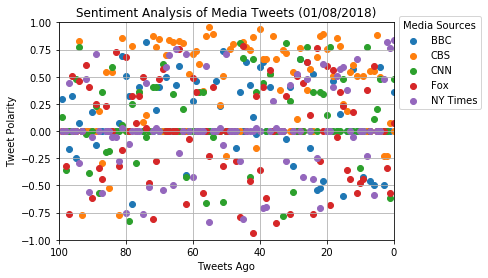

In [12]:
#Setup Scatterplot
plt.scatter(tweet_ago, bbc_compScore, label = "BBC")
plt.scatter(tweet_ago, cbs_compScore, label = "CBS")
plt.scatter(tweet_ago, cnn_compScore, label = "CNN")
plt.scatter(tweet_ago, fox_compScore, label = "Fox")
plt.scatter(tweet_ago, nyt_compScore, label = "NY Times")
lgd = plt.legend(title = "Media Sources", bbox_to_anchor=(1.0, 1.05))
plt.title("Sentiment Analysis of Media Tweets (01/08/2018)")
plt.xlim(100,0)
plt.ylim(-1,1)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.grid()
plt.savefig("TweetSentAnalysis.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [16]:
#Setup x and y values for the bar chart
bbc_agg_compScore = bbc_compScore.sum()
cbs_agg_compScore = cbs_compScore.sum()
cnn_agg_compScore = cnn_compScore.sum()
fox_agg_compScore = fox_compScore.sum()
nyt_agg_compScore = nyt_compScore.sum()
media_source = ["BBC", "CBS", "CNN", "FoxNews", "nytimes"]
media_agg_score = [bbc_agg_compScore,cbs_agg_compScore,cnn_agg_compScore,fox_agg_compScore,nyt_agg_compScore]

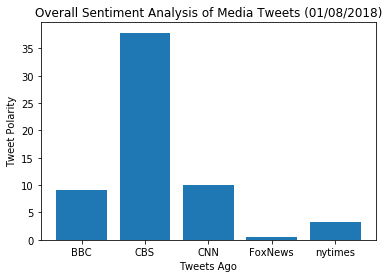

In [21]:
#Setup bar chart
x = [1,2,3,4,5]
plt.bar(x,media_agg_score)
plt.title("Overall Sentiment Analysis of Media Tweets (01/08/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xticks(x, media_source)
plt.savefig("OverallSentAnalysis.png")
plt.show()